In [1]:
#import libraries
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import spacy
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to C:\Users\Josiah
[nltk_data]     Lee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Josiah
[nltk_data]     Lee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.DataFrame(pd.read_csv('Twitter Sentiment/cleanedNspelt.csv'))

def helper(string):
    temp = []
    for word in string[1:-1].split(','):
        word = word.strip()
        word = word[1:-1]
        if word:
          temp.append(word)  
    return temp
data.filtered_tokens = data.filtered_tokens.apply(helper)

Use if machine not strong

In [10]:
#data = data.iloc[25000:75000]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data.filtered_tokens, data['labels'], stratify = data.labels, test_size=0.2, random_state=42)

In [4]:
vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2), stop_words='english')
sentences = [' '.join(words) for words in X_train]

# Fit and transform the sentences
one_hot_encoded = vectorizer.fit_transform(sentences)


In [5]:
from sklearn.decomposition import TruncatedSVD

# Create a PCA instance
SVD = TruncatedSVD(n_components=100)

# Fit and transform your one-hot encoded data
SVD.fit(one_hot_encoded)

explained_variance = SVD.explained_variance_

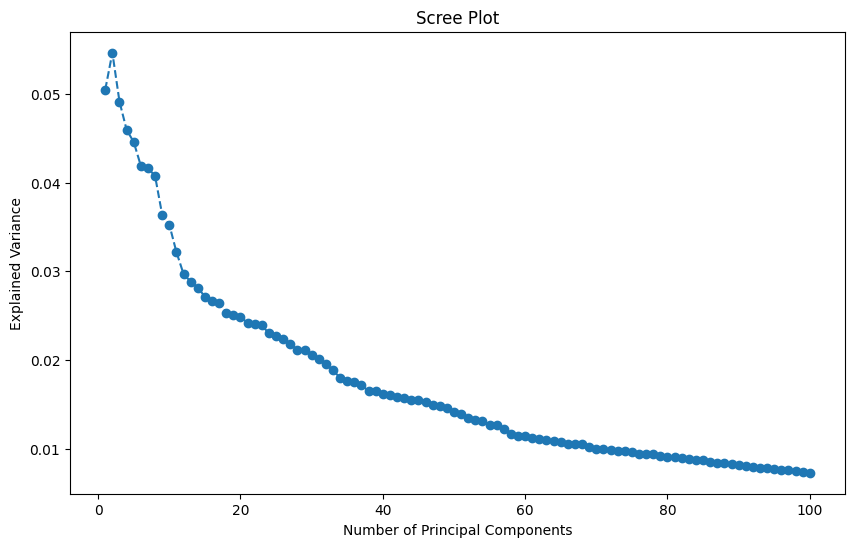

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.show()


In [15]:
SVD = TruncatedSVD(n_components=30)
X_train_new = SVD.fit_transform(one_hot_encoded)

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=20, random_state=42)
rf_classifier.fit(X_train_new, y_train)


RandomForestClassifier(n_estimators=20, random_state=42)

In [17]:
sen = [' '.join(words) for words in X_test]
X_test_new = vectorizer.transform(sen)
X_test_new = SVD.transform(X_test_new)

In [18]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = rf_classifier.predict(X_test_new)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# You can also print a classification report for more details
print(classification_report(y_test, y_pred))


Accuracy: 0.66
              precision    recall  f1-score   support

           0       0.65      0.69      0.67     10000
           1       0.67      0.63      0.65     10000

    accuracy                           0.66     20000
   macro avg       0.66      0.66      0.66     20000
weighted avg       0.66      0.66      0.66     20000



In [ ]:
y_pred_prob = clf.predict_proba(X_test_new)[:, 1]

fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [ ]:
print(sklearn.metrics.roc_auc_score(y_test, y_pred_prob))